# Volatility Estimation Notebook

To use, install the dependencies noted in the README and configure the parameters when noted below

In [1]:
import ccxt
import datetime
import pandas as pd
import yfinance as yf
from volatility import volest

In [2]:
def load_ftx_price_data(symbol):
    """Loads crypto price data from FTX.com into a dataframe in a format acceptable to the volest library"""
    ftx = ccxt.ftx()

    res = ftx.fetch_ohlcv(symbol, '1d', limit=1325)  # 1325 days == 5 years
    timestamps = [datetime.datetime.fromtimestamp(row[0] / 1000) for row in res]
    ohlcv = [row[1:] for row in res]
    df = pd.DataFrame(ohlcv, index=timestamps, columns=('Open', 'High', 'Low', 'Close', 'Volume'))
    df.symbol = symbol

    return df

In [3]:
def load_yahoo_price_data(symbol):
    """Loads equity price data from Yahoo! Finance into a dataframe in a format acceptable to the volest library"""
    df = yf.Ticker(symbol).history(period='5y')
    df.symbol = symbol

    return df

In [4]:
# Pull in a price data series. I have given two templates below: one for crypto and one for equities.
price_data = load_ftx_price_data('ETH/USD')
# price_data = load_yahoo_price_data('QQQ')

In [5]:
# Estimator configuration
estimator = 'YangZhang'
window = 30
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]
bins = 100
normed = False
figsize = (20, 15)

vol = volest.VolatilityEstimator(
    price_data=price_data,
    estimator=estimator,
)

(<Figure size 1440x1080 with 2 Axes>,
 <module 'matplotlib.pyplot' from '/home/ianthetechie/lib64/python3.10/site-packages/matplotlib/pyplot.py'>)

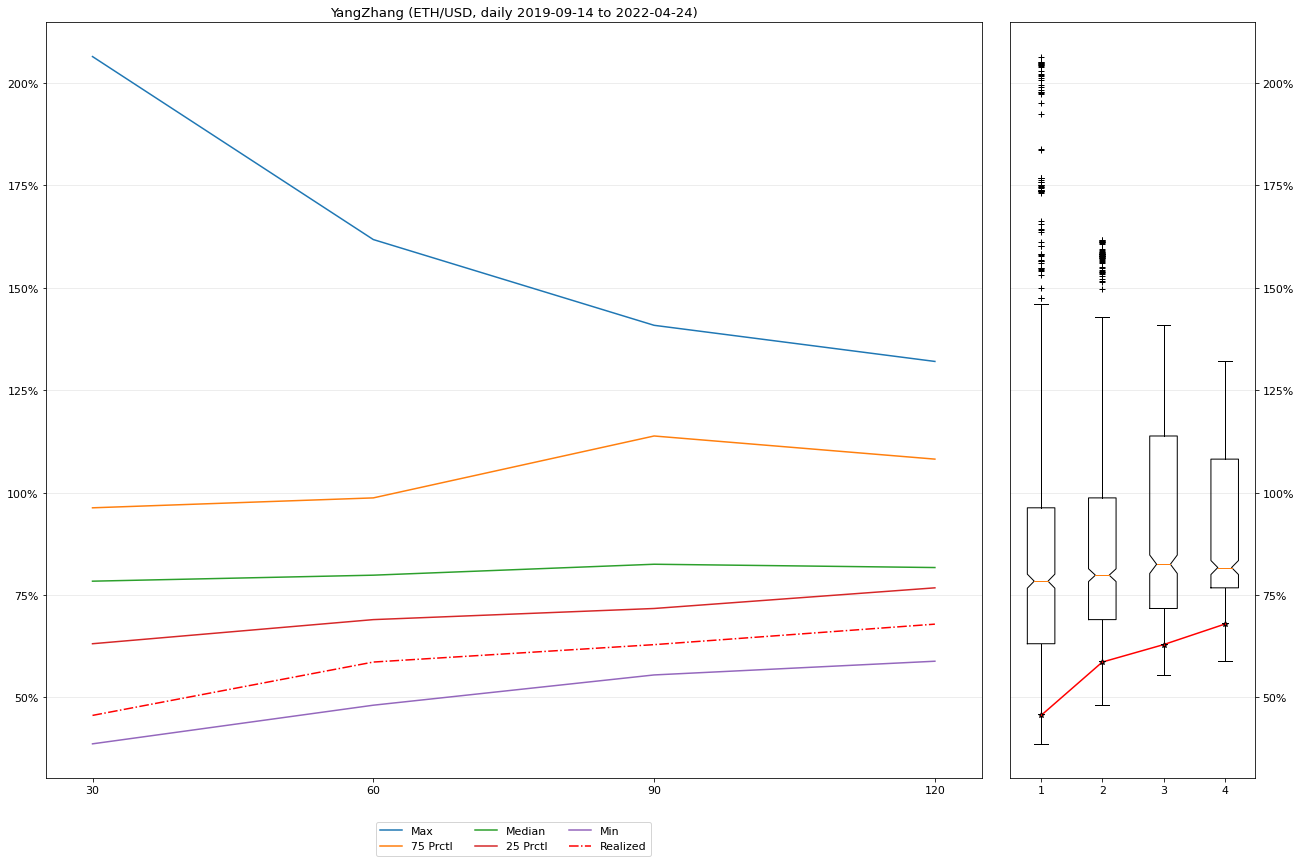

In [6]:
vol.cones(windows=windows, quantiles=quantiles, figsize=figsize)

(<Figure size 1440x1080 with 2 Axes>,
 <module 'matplotlib.pyplot' from '/home/ianthetechie/lib64/python3.10/site-packages/matplotlib/pyplot.py'>)

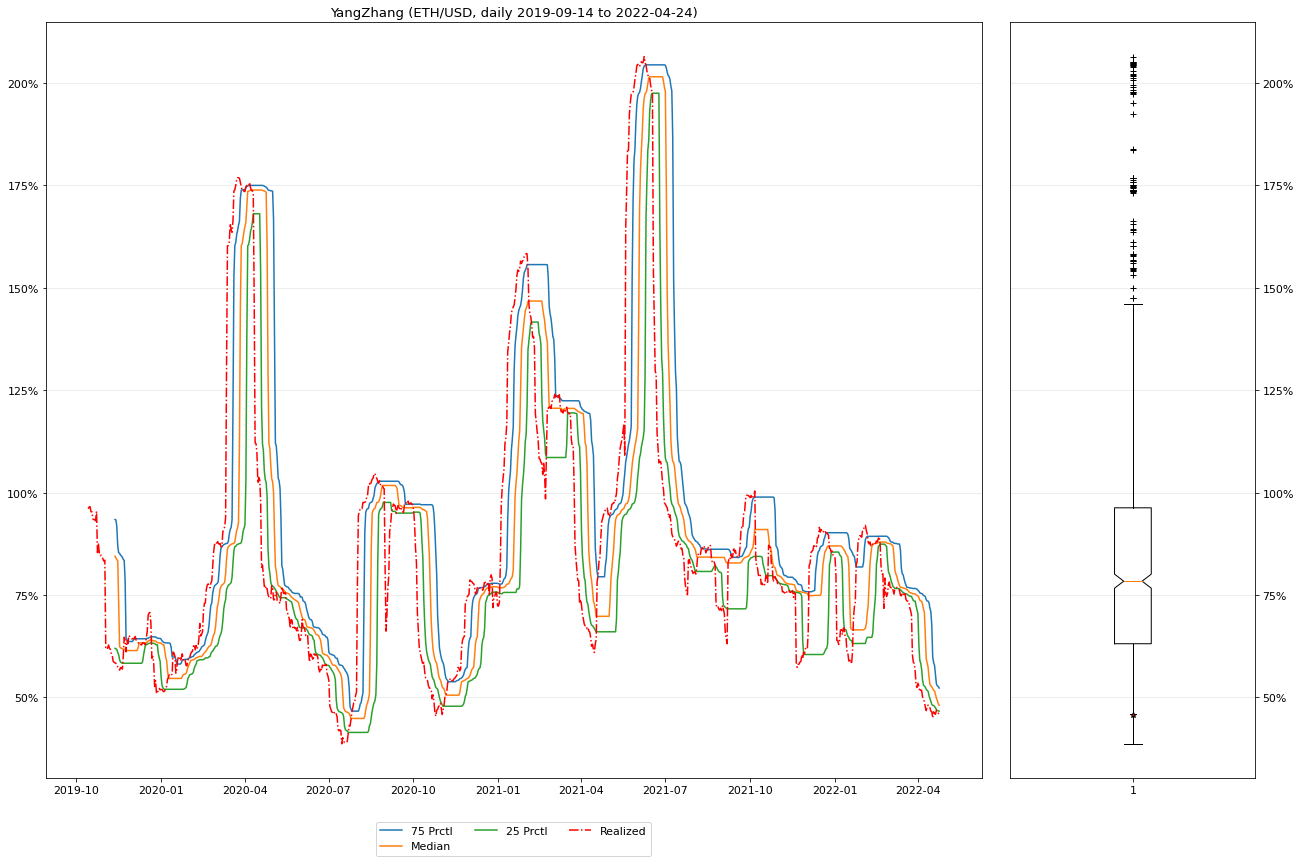

In [7]:
vol.rolling_quantiles(window=window, quantiles=quantiles, figsize=figsize)

(<Figure size 1440x1080 with 2 Axes>,
 <module 'matplotlib.pyplot' from '/home/ianthetechie/lib64/python3.10/site-packages/matplotlib/pyplot.py'>)

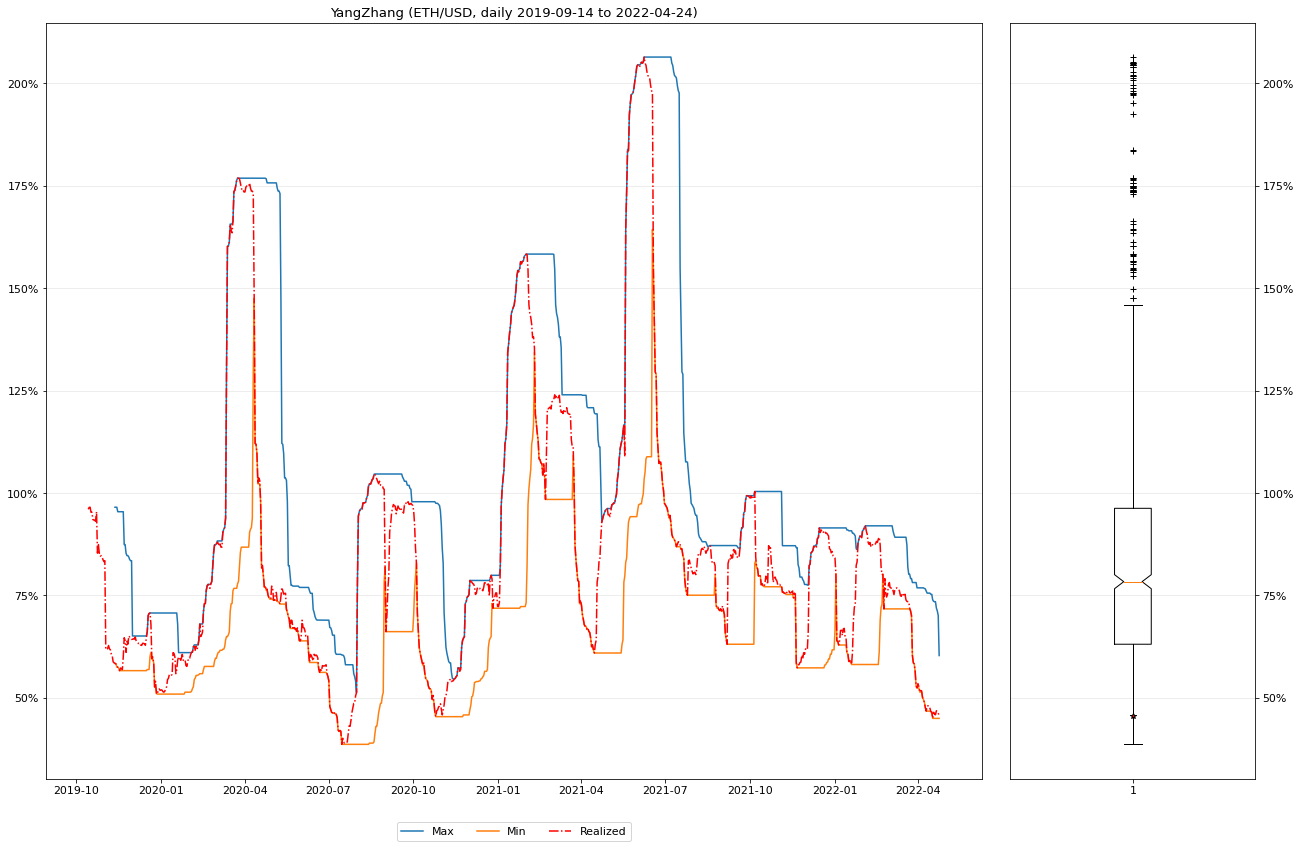

In [8]:
vol.rolling_extremes(window=window, figsize=figsize)

(<Figure size 1440x1080 with 3 Axes>,
 <module 'matplotlib.pyplot' from '/home/ianthetechie/lib64/python3.10/site-packages/matplotlib/pyplot.py'>)

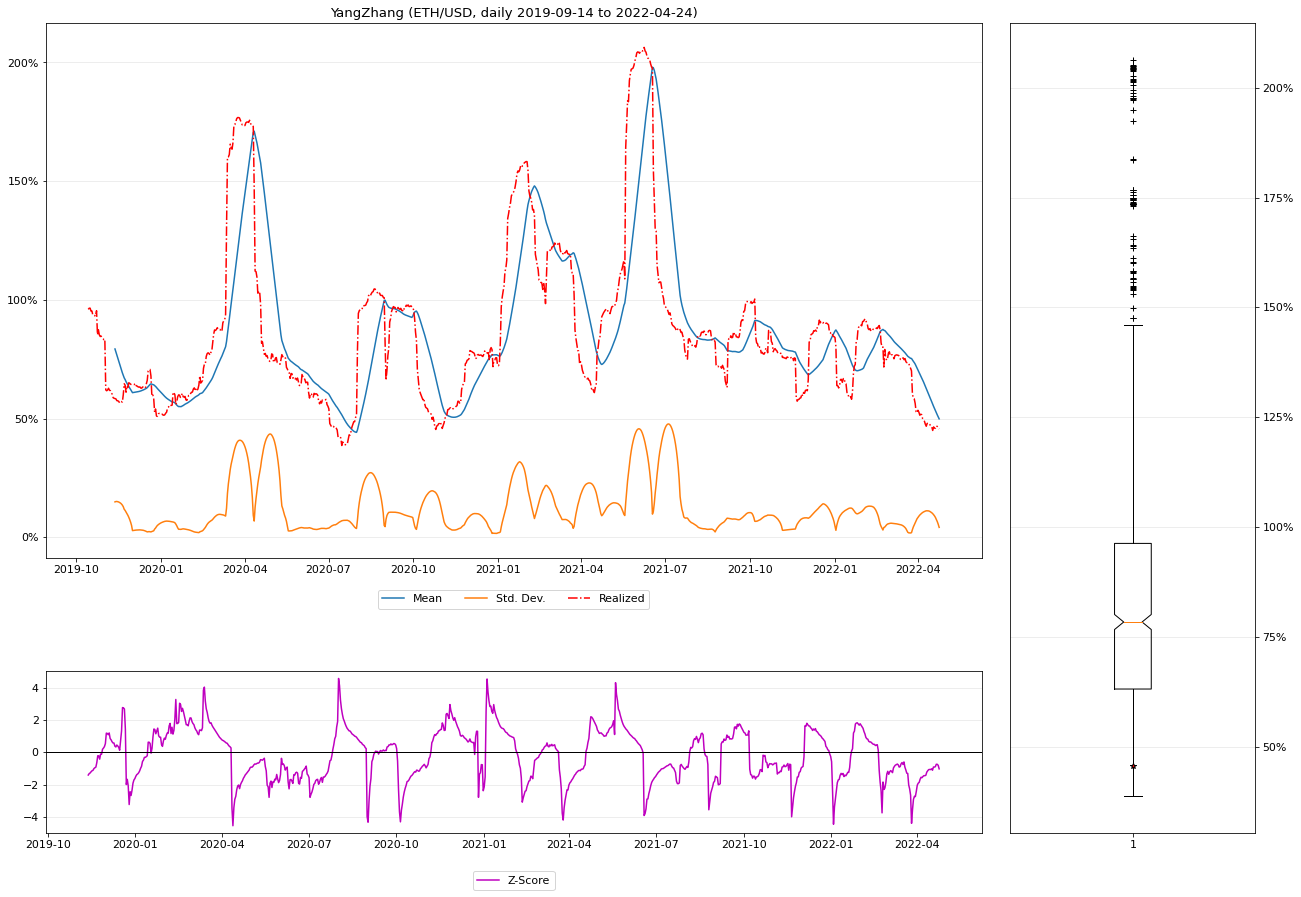

In [9]:
vol.rolling_descriptives(window=window, figsize=figsize)

(<Figure size 1440x1080 with 1 Axes>,
 <module 'matplotlib.pyplot' from '/home/ianthetechie/lib64/python3.10/site-packages/matplotlib/pyplot.py'>)

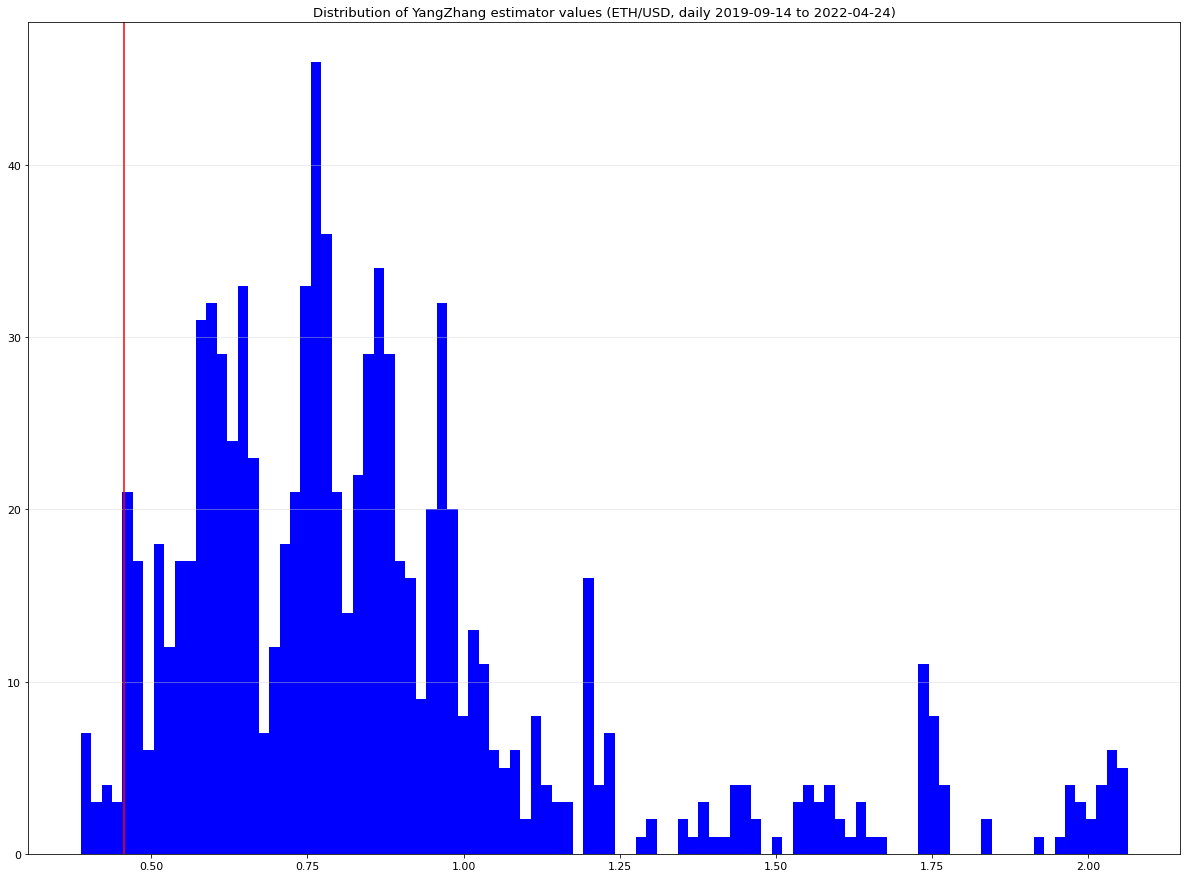

In [10]:
vol.histogram(window=window, bins=bins, normed=normed, figsize=figsize)